In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load CSV
df = pd.read_csv('Production.csv', encoding='ISO-8859-1',  sep=';')

# Verify name columns
print(df.columns)

# Show first records
print(df.head())

# Check for null values
print(df.isnull().sum())

# Era 'Unnamed: 0' (name column)
df = df.drop(columns=['Nombre'])

print(df)

Index(['Nombre', 'Fecha', 'Producció (kWh)'], dtype='object')
                         Nombre       Fecha Producció (kWh)
0  Escuela de IngenierÃ­a - UAB  31/12/2023          423,19
1  Escuela de IngenierÃ­a - UAB  30/12/2023          522,41
2  Escuela de IngenierÃ­a - UAB  29/12/2023          296,39
3  Escuela de IngenierÃ­a - UAB  28/12/2023          296,74
4  Escuela de IngenierÃ­a - UAB  27/12/2023          566,03
Nombre             0
Fecha              0
Producció (kWh)    0
dtype: int64
          Fecha Producció (kWh)
0    31/12/2023          423,19
1    30/12/2023          522,41
2    29/12/2023          296,39
3    28/12/2023          296,74
4    27/12/2023          566,03
..          ...             ...
117    5/9/2023         1249,62
118    4/9/2023         1208,12
119    3/9/2023          882,32
120    2/9/2023          613,25
121    1/9/2023         1295,15

[122 rows x 2 columns]


In [ ]:
# Convert the 'Producció (kWh)' column to numeric
df['Producció (kWh)'] = df['Producció (kWh)'].str.replace(',', '.').astype(float)

# Convert the 'Fecha' column to datetime
df['Fecha'] = pd.to_datetime(df['Fecha'], dayfirst=True)

# Stablish 'Fecha' as the index of the DataFrame
df.set_index('Fecha', inplace=True)


In [ ]:
# MEAN
# Group the data by month and calculate the average energy consumption
df_monthly_mean = df.resample('M').mean()

# Restart the index to get 'Fecha' as a column
df_monthly_mean.reset_index(inplace=True)

# Obtain the month name from the 'Fecha' column
df_monthly_mean['Fecha'] = df_monthly_mean['Fecha'].dt.strftime('%B')

print(df_monthly_mean)

# SUM
# Group the data by month and calculate the total energy consumption
df_monthly_sum = df.resample('M').sum()

# Restart the index to get 'Fecha' as a column
df_monthly_sum.reset_index(inplace=True)

# Obtain the month name from the 'Fecha' column
df_monthly_sum['Fecha'] = df_monthly_sum['Fecha'].dt.strftime('%B')

print(df_monthly_sum)

# PER MONTH
# Create DataFrames for each month (it can be change if there are more months)
df_September = df[df.index.month == 9].copy()
df_October = df[df.index.month == 10].copy()
df_November = df[df.index.month == 11].copy()
df_December = df[df.index.month == 12].copy()


# Print the DataFrames to check if they are correct
'''
print("Datos para el mes de Septiembre:")
print(df_September)
print("\n")

print("Datos para el mes de Octubre:")
print(df_October)
print("\n")

print("Datos para el mes de Noviembre:")
print(df_November)
print("\n")

print("Datos para el mes de Diciembre:")
print(df_December)
print("\n")
'''

In [ ]:
# Checking if the sum is correct:
# Calculate the total energy consumption in the original DataFrame
total_original = df['Producció (kWh)'].sum()

# Calculate the total energy consumption in the grouped DataFrame
total_agrupado = df_monthly_sum['Producció (kWh)'].sum()

# Compare the sums
if total_original == total_agrupado:
    print("La suma está bien hecha. Ambas sumas son iguales:", total_original)
else:
    print("La suma no está bien hecha. Las sumas son diferentes.")
    print("Suma original:", total_original)
    print("Suma agrupada:", total_agrupado)


La suma no está bien hecha. Las sumas son diferentes.
Suma original: 90214.99999999999
Suma agrupada: 90215.0


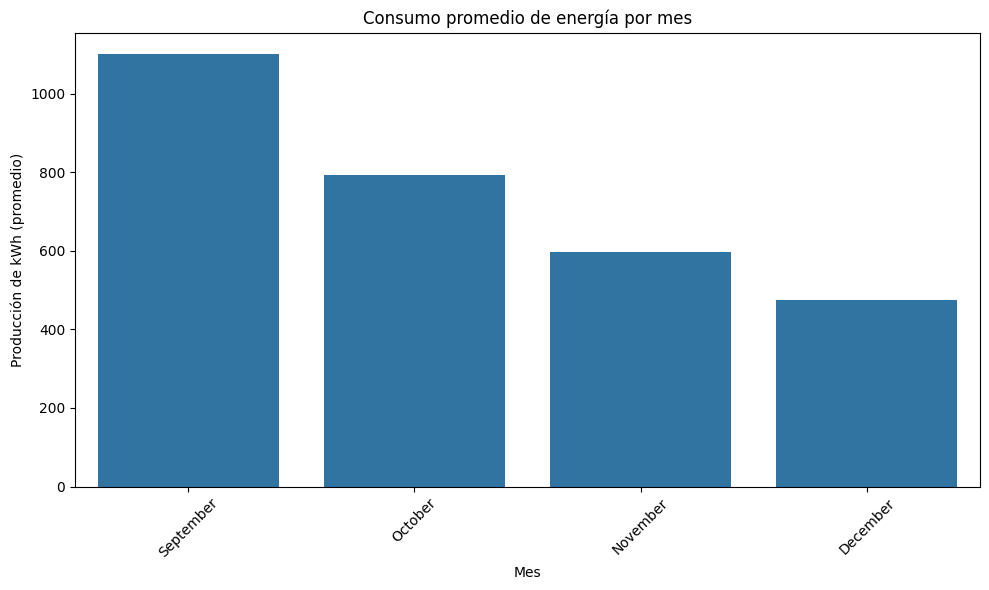

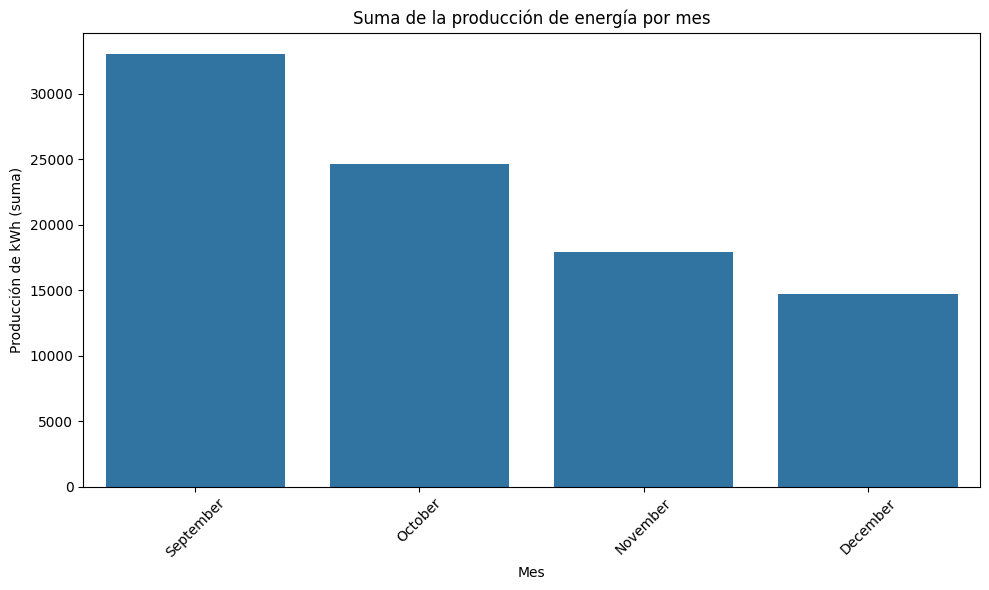

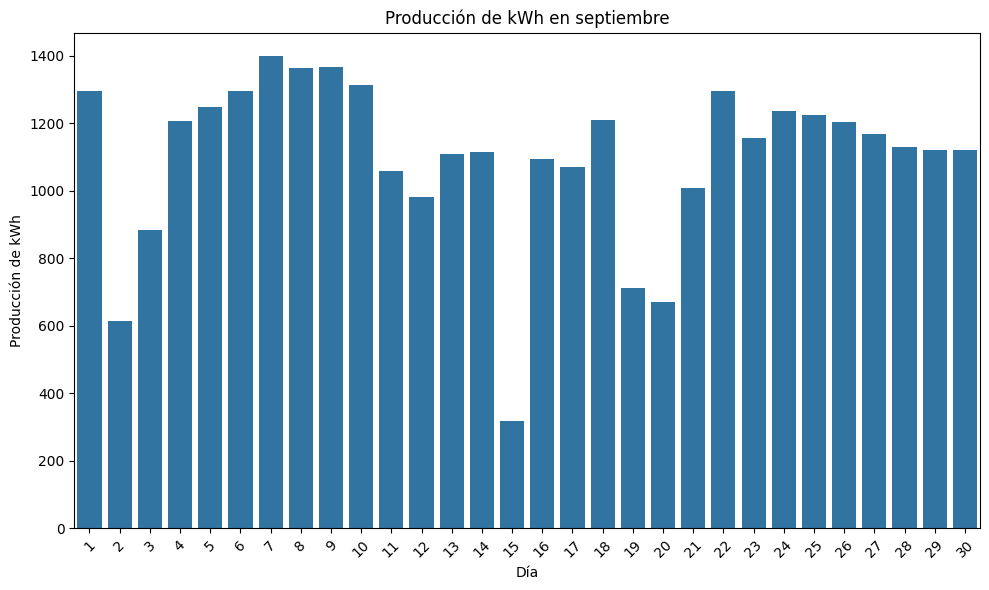

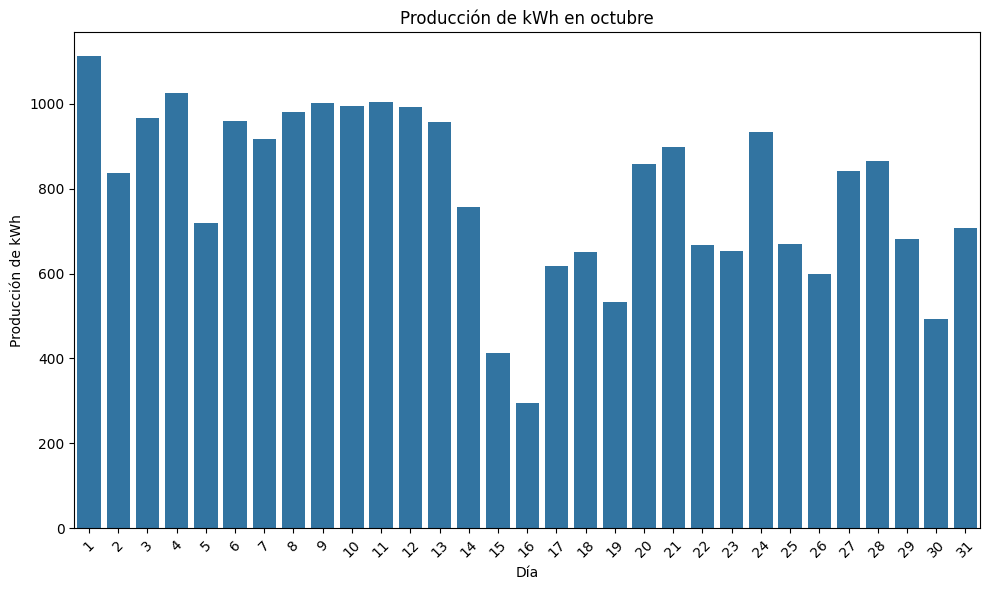

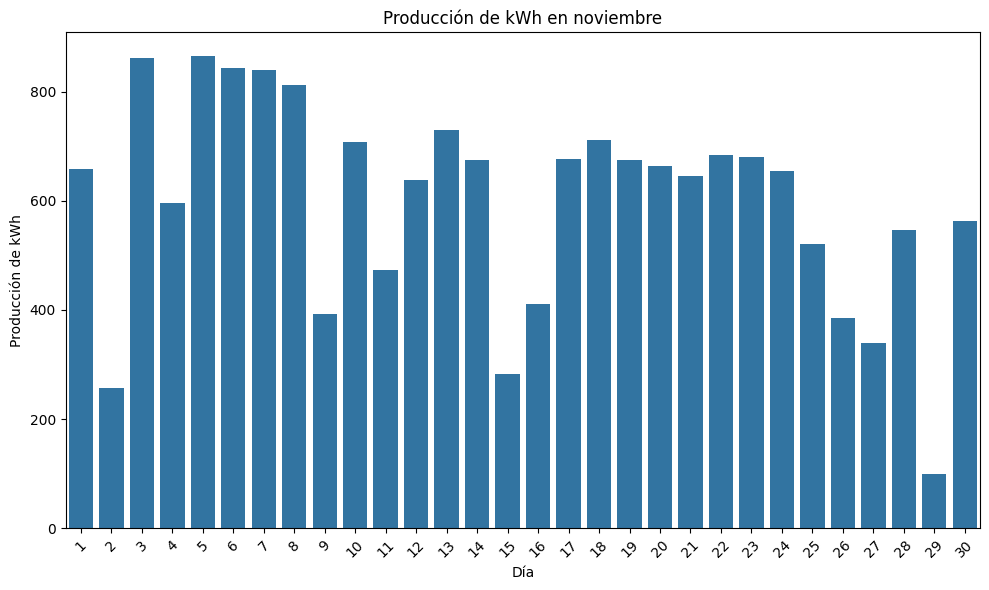

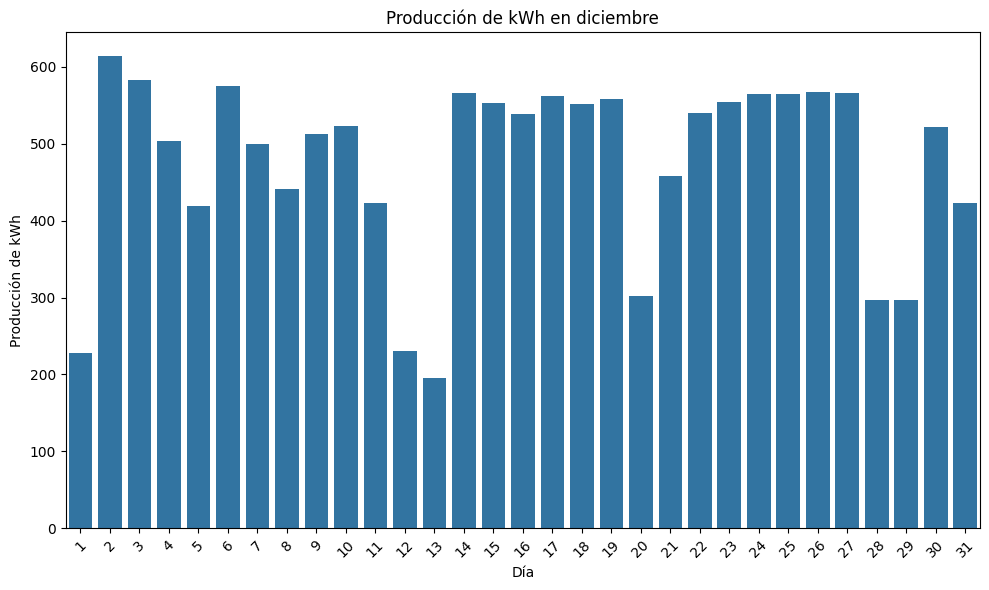

In [ ]:
# Configure the size of the plots
plt.figure(figsize=(10, 6))

# Bar plot for the average energy consumption per month
sns.barplot(x='Date', y='Production (kWh)', data=df_monthly_mean)
plt.title('Average energy consumption per month')
plt.xlabel('Month')
plt.ylabel('Production in kWh (average)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Configure the size of the plots
plt.figure(figsize=(10, 6))

# Bar plot for the sum of energy production per month
sns.barplot(x='Date', y='Production (kWh)', data=df_monthly_sum)
plt.title('Sum of energy production per month')
plt.xlabel('Month')
plt.ylabel('Production in kWh (sum)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Configure the size of the plots
plt.figure(figsize=(10, 6))

# Bar plot for September data
sns.barplot(x=df_September.index.day, y='Production (kWh)', data=df_September)
plt.title('kWh production in September')
plt.xlabel('Day')
plt.ylabel('Production in kWh')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Configure the size of the plots
plt.figure(figsize=(10, 6))

# Bar plot for October data
sns.barplot(x=df_October.index.day, y='Production (kWh)', data=df_October)
plt.title('kWh production in October')
plt.xlabel('Day')
plt.ylabel('Production in kWh')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Configure the size of the plots
plt.figure(figsize=(10, 6))

# Bar plot for November data
sns.barplot(x=df_November.index.day, y='Production (kWh)', data=df_November)
plt.title('kWh production in November')
plt.xlabel('Day')
plt.ylabel('Production in kWh')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Configure the size of the plots
plt.figure(figsize=(10, 6))

# Bar plot for December data
sns.barplot(x=df_December.index.day, y='Production (kWh)', data=df_December)
plt.title('kWh production in December')
plt.xlabel('Day')
plt.ylabel('Production in kWh')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


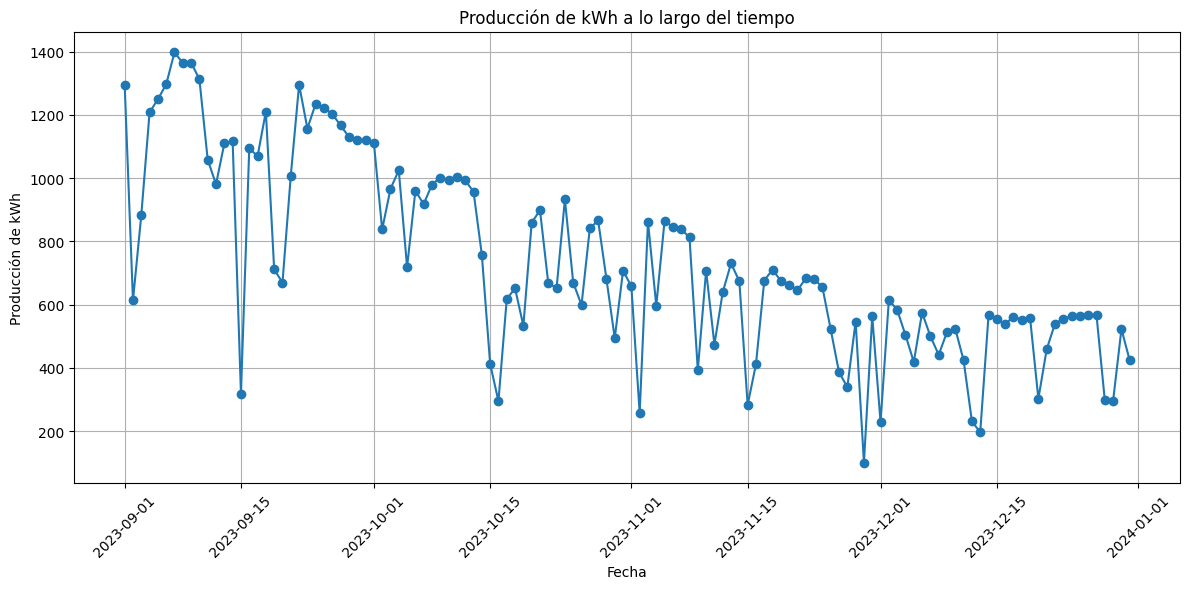

In [ ]:
# Gráfico de línea para mostrar la producción de kWh a lo largo del tiempo
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Producció (kWh)'], marker='o', linestyle='-')
plt.title('Producción de kWh a lo largo del tiempo')
plt.xlabel('Fecha')
plt.ylabel('Producción de kWh')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


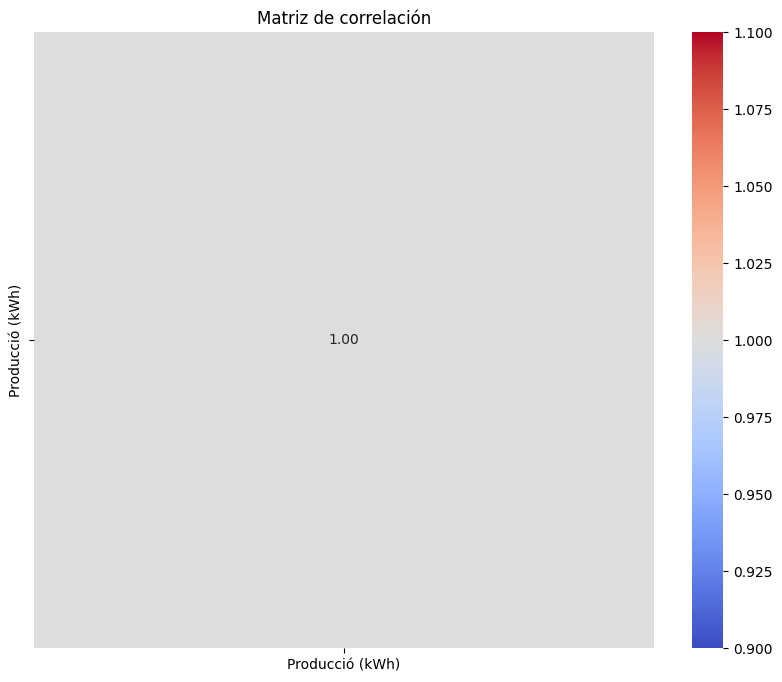

In [ ]:
# Calcular la matriz de correlación (solo tengo una columna, so xd)
correlation_matrix = df.corr()

# Crear un mapa de calor para visualizar la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlación')
plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency -1D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


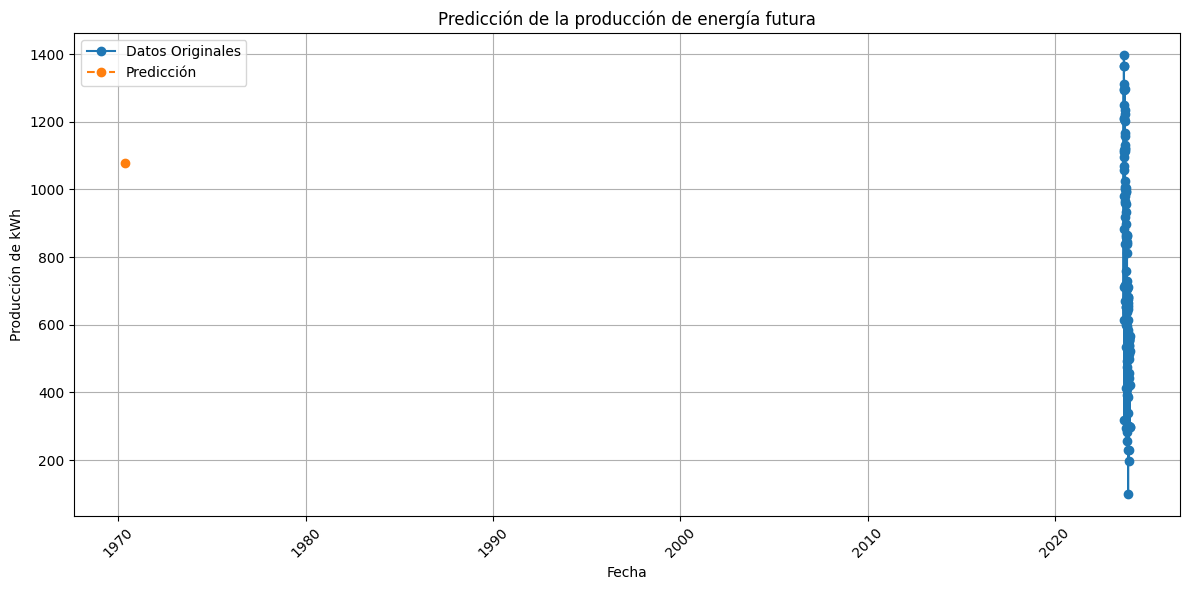

In [ ]:
# FUTURE PREDICTION (it doesn't work, obviusly because I don't have enough data)
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Utilizar todos los datos disponibles para el entrenamiento
train = df['Producció (kWh)']

# Ajustar el modelo de suavizado exponencial sin especificar la estacionalidad
model = ExponentialSmoothing(train).fit()

# Predecir la producción de energía futura (supongamos un mes adicional)
predictions = model.forecast(steps=1)

# Graficar los datos originales y las predicciones
plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='Datos Originales', marker='o', linestyle='-')
plt.plot(predictions.index, predictions, label='Predicción', marker='o', linestyle='--')
plt.title('Predicción de la producción de energía futura')
plt.xlabel('Fecha')
plt.ylabel('Producción de kWh')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


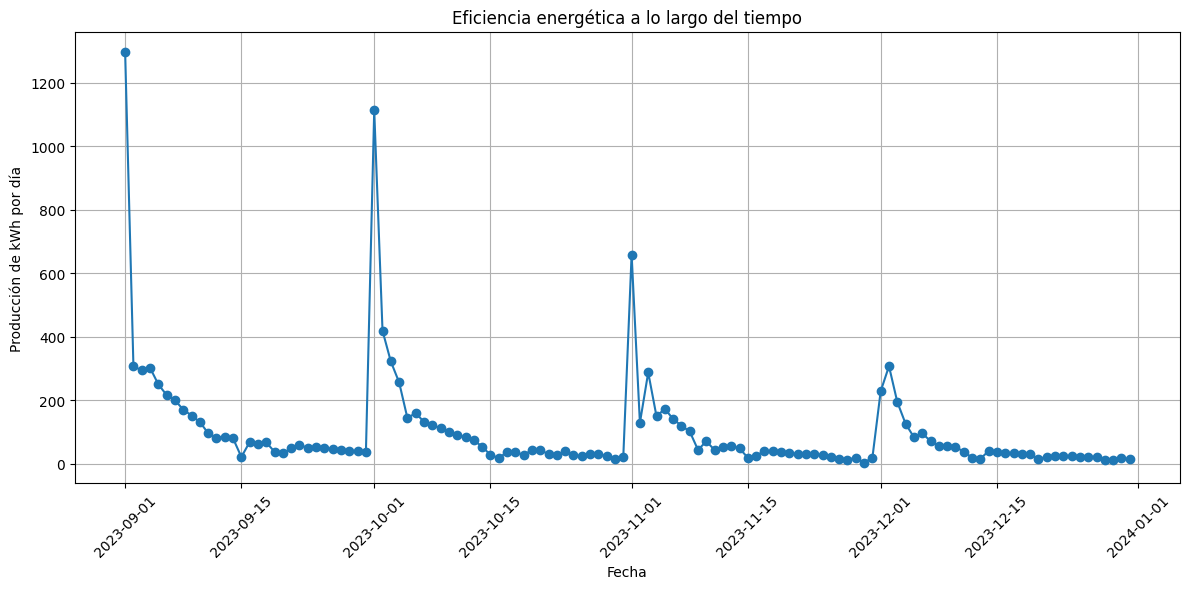

In [ ]:
# Calcular la eficiencia energética (producción de kWh por día)
df['Eficiencia energética'] = df['Producció (kWh)'] / df.index.day

# Gráfico de línea para mostrar la eficiencia energética a lo largo del tiempo
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Eficiencia energética'], marker='o', linestyle='-')
plt.title('Eficiencia energética a lo largo del tiempo')
plt.xlabel('Fecha')
plt.ylabel('Producción de kWh por día')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()
